<a href="https://colab.research.google.com/github/nouretienne/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/U1S1M1%262_PRACTICE_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Auto MPG Data Set**

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes. Ross Quinlan (1993) in predicting the attribute "mpg". 

In [ ]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

In [ ]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original

**Let's create a function that gets the name of the headers.**

In [47]:
text = """1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)"""
t = text.strip('\n')
headers = [t.split(':')[0].split()[1] for t in text.split('\n')]
headers

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model',
 'origin',
 'car']

In [74]:
url_address = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

import pandas as pd
import numpy as np

mpg =  pd.read_csv(url_address, sep='\s+', header=None, names=headers)
print(mpg.shape)
mpg.sample(5)

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
99,18.0,6,232.0,100.0,2945.0,16.0,73,1,amc hornet
188,16.0,8,318.0,150.0,4190.0,13.0,76,1,dodge coronet brougham
263,17.7,6,231.0,165.0,3445.0,13.4,78,1,buick regal sport coupe (turbo)
304,37.3,4,91.0,69.00,2130.0,14.7,79,2,fiat strada custom
194,22.5,6,232.0,90.00,3085.0,17.6,76,1,amc hornet


Let's look at the type of my dataframe

We can see horsepower and is declared as an object. Beside we know the existence of 
missing values.


In [75]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model             int64
origin            int64
car              object
dtype: object

In [76]:
mpg = mpg.replace('?',np.NaN)
type(mpg['horsepower'].iloc[32])

float

But the data itself is recorded as a string. 

In [77]:
def str_to_float(input):
  if isinstance(input, str):
    return float(input)
  else:
    return input

mpg['horsepower'] = mpg['horsepower'].apply(str_to_float)

In [78]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model             int64
origin            int64
car              object
dtype: object

In [79]:
mpg['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [80]:
mpg['model'].value_counts(ascending=False)

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model, dtype: int64

In [81]:
mpg['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [82]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


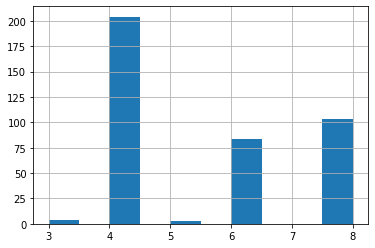

In [83]:
mpg['cylinders'].hist()

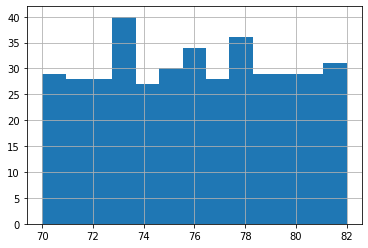

In [84]:
mpg['model'].hist(bins=13)

Density Plot Kernel

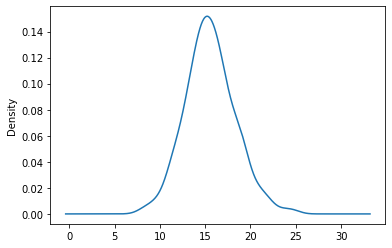

In [91]:
mpg['acceleration'].plot.density()

Scatter Plot

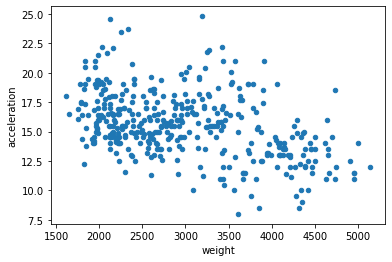

In [88]:
mpg.plot.scatter('weight','acceleration')

In [93]:
pd.crosstab(mpg['origin'],mpg['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
1,0,72,0,74,103
2,0,63,3,4,0
3,4,69,0,6,0


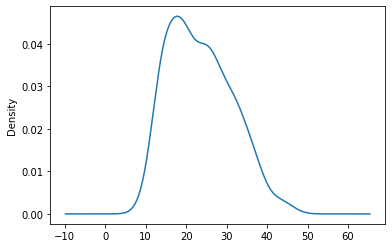

In [94]:
mpg['mpg'].plot.density()

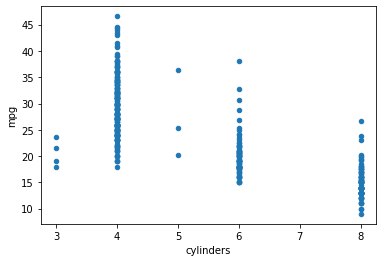

In [95]:
mpg.plot.scatter('cylinders','mpg')

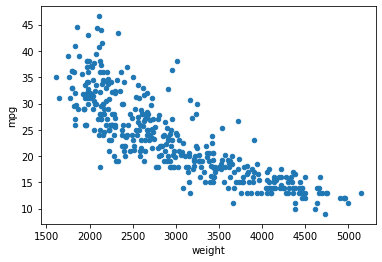

In [96]:
mpg.plot.scatter('weight','mpg')

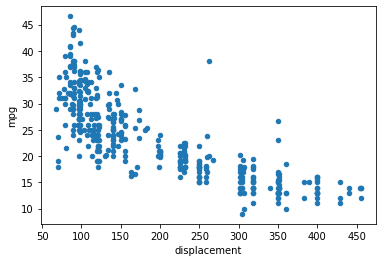

In [97]:
mpg.plot.scatter('displacement','mpg')

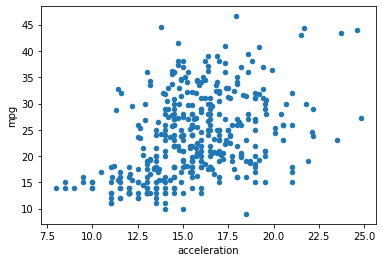

In [98]:
mpg.plot.scatter('acceleration','mpg')

In [100]:
pd.crosstab(mpg['model'],mpg['cylinders'])

cylinders,3,4,5,6,8
model,,,,,
70,0,7,0,4,18
71,0,13,0,8,7
72,1,14,0,0,13
73,1,11,0,8,20
74,0,15,0,7,5
75,0,12,0,12,6
76,0,15,0,10,9
77,1,14,0,5,8
78,0,17,1,12,6


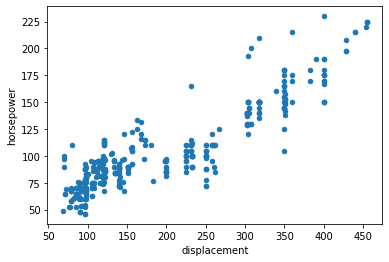

In [101]:
mpg.plot.scatter('displacement','horsepower')